In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer

In [75]:
df_og = pd.read_csv(r"C:\Work\Programing Language\task4\Game-Recommendation-System\data\raw\video_game_reviews.csv")
df = pd.read_csv(r"C:\Work\Programing Language\task4\Game-Recommendation-System\data\raw\video_game_reviews.csv")
df.sample(5)

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
21323,Pokémon Scarlet & Violet,26.8,Adults,20.99,Xbox,Yes,CD Projekt Red,Take-Two Interactive,2010,RPG,No,51.0,Low,Poor,Poor,"Disappointing game, but too many bugs.",Offline,5
30270,Cuphead,37.7,Adults,59.41,Nintendo Switch,No,Bungie,Square Enix,2018,Shooter,No,22.6,High,Excellent,Excellent,"Solid game, but too many bugs.",Offline,4
14663,Bioshock Infinite,34.2,Kids,39.66,PlayStation,No,Valve,Innersloth,2013,Strategy,Yes,51.9,Medium,Poor,Excellent,"Amazing game, but the graphics could be better.",Offline,8
20137,Bioshock Infinite,18.7,Kids,31.66,PC,No,CD Projekt Red,Innersloth,2013,Shooter,No,13.8,High,Excellent,Excellent,"Great game, but the gameplay is amazing.",Offline,4
24027,The Sims 4,32.2,Adults,58.03,Mobile,Yes,Rockstar Games,Square Enix,2023,Party,No,14.3,High,Average,Average,"Disappointing game, but the graphics could be ...",Offline,7


In [76]:
print(f"Shape : {df.shape}")
print(f"Describe : {df.describe().T}")
df.info()

Shape : (47774, 18)
Describe :                          count         mean        std      min      25%  \
User Rating            47774.0    29.719329   7.550131    10.10    24.30   
Price                  47774.0    39.951371  11.520342    19.99    29.99   
Release Year           47774.0  2016.480952   4.027276  2010.00  2013.00   
Game Length (Hours)    47774.0    32.481672  15.872508     5.00    18.80   
Min Number of Players  47774.0     5.116758   2.769521     1.00     3.00   

                            50%        75%      max  
User Rating              29.700    35.1000    49.50  
Price                    39.845    49.9575    59.99  
Release Year           2016.000  2020.0000  2023.00  
Game Length (Hours)      32.500    46.3000    60.00  
Min Number of Players     5.000     7.0000    10.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------              

In [77]:
print(f"Null count : {df.isnull().sum()}")

Null count : Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64


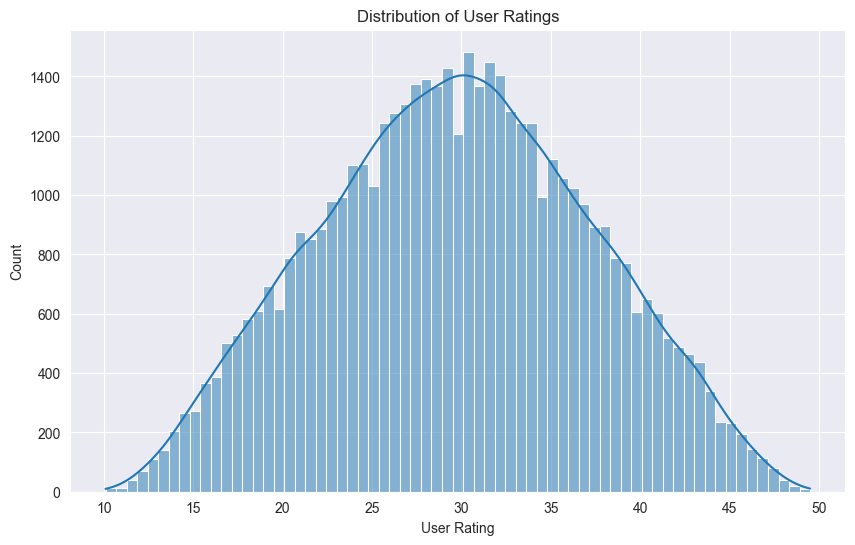

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(df['User Rating'],kde=True)
plt.title("Distribution of User Ratings")
plt.show()

### Data Processing


In [79]:
print(f"Original Shape :{df_og.shape}")


Original Shape :(47774, 18)


In [80]:
df.dropna(subset=['Game Title'],inplace=True)


In [81]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns  # Use object instead of np.object
numerical_cols, categorical_cols

(Index(['User Rating', 'Price', 'Release Year', 'Game Length (Hours)',
        'Min Number of Players'],
       dtype='object'),
 Index(['Game Title', 'Age Group Targeted', 'Platform',
        'Requires Special Device', 'Developer', 'Publisher', 'Genre',
        'Multiplayer', 'Graphics Quality', 'Soundtrack Quality',
        'Story Quality', 'User Review Text', 'Game Mode'],
       dtype='object'))

Text(0.5, 1.0, 'Corr Heatmap')

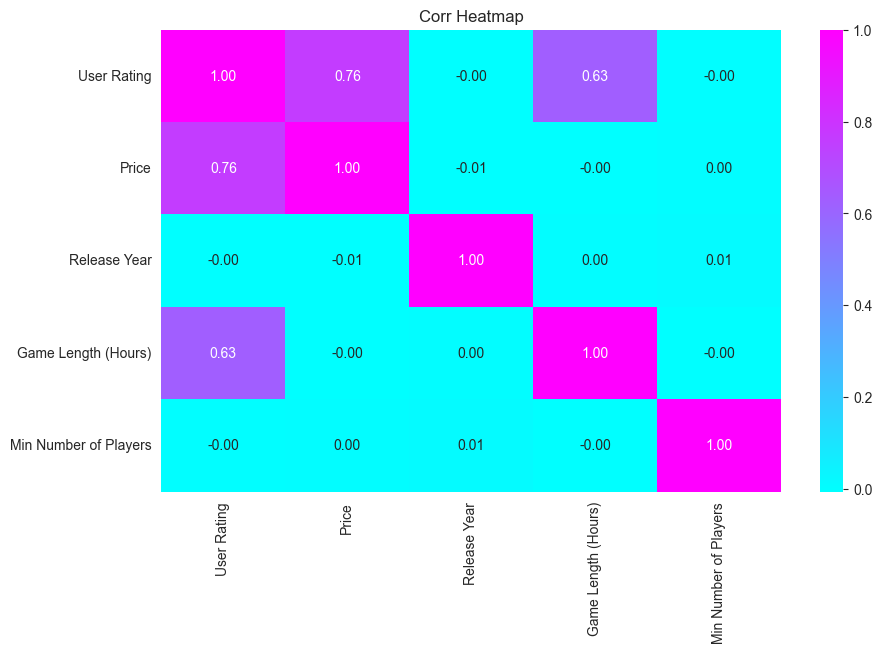

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='cool',fmt = '.2f')
plt.title("Corr Heatmap")


<Axes: xlabel='Age Group Targeted', ylabel='count'>

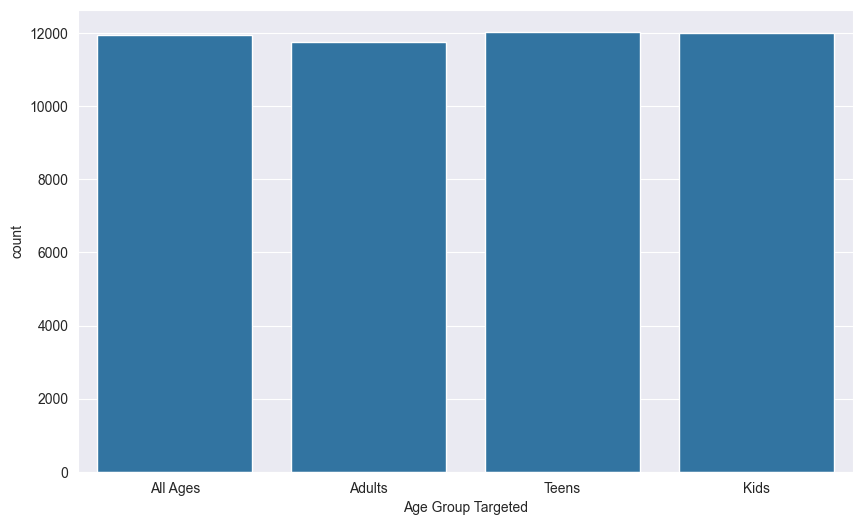

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(data = df,x = 'Age Group Targeted')


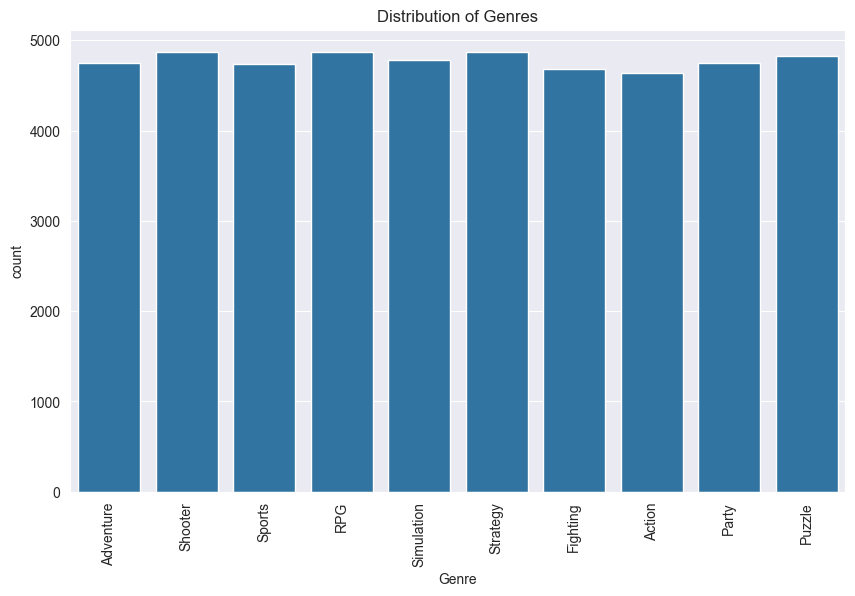

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Genre')
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.show()

### Encoding

In [85]:
print(df['Graphics Quality'].unique())
print(df['Soundtrack Quality'].unique())
print(df['Story Quality'].unique())

['Medium' 'Low' 'High' 'Ultra']
['Average' 'Poor' 'Good' 'Excellent']
['Poor' 'Average' 'Excellent' 'Good']


In [86]:
graphics_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Ultra': 4}
soundtrack_map = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}
story_map = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}

# Apply mappings
df['Graphics_Score'] = df['Graphics Quality'].map(graphics_map)
df['Soundtrack_Score'] = df['Soundtrack Quality'].map(soundtrack_map)
df['Story_Score'] = df['Story Quality'].map(story_map)

df['Overall_Quality_Score'] = df[['Graphics_Score', 'Soundtrack_Score', 'Story_Score']].mean(axis=1).round(2)

df.drop(['Graphics Quality', 'Soundtrack Quality', 'Story Quality'], axis=1, inplace=True)
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),User Review Text,Game Mode,Min Number of Players,Graphics_Score,Soundtrack_Score,Story_Score,Overall_Quality_Score
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,"Solid game, but too many bugs.",Offline,1,2,2,1,1.67
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,"Solid game, but too many bugs.",Offline,3,1,1,1,1.00
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,"Great game, but the graphics could be better.",Offline,5,1,3,2,2.00
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,"Solid game, but the graphics could be better.",Online,4,2,3,4,3.00
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,"Great game, but too many bugs.",Offline,1,3,1,3,2.33


### To drop
* Min number of Players
* User Review Text
* Story Quality
* Soundtrack Quality
* Graphics Quality
* Release Year
* Publisher
* Developer
* Price

In [87]:
print(f"Before Drop {df.shape}")
df = df.drop(['Min Number of Players', 'User Review Text','Release Year',
                              'Publisher', 'Developer', 'Price'], axis=1)
print(f"After Drop {df.shape}")

Before Drop (47774, 19)
After Drop (47774, 13)


In [88]:
df[df['Overall_Quality_Score'] == 4]


,Game Title,User Rating,Age Group Targeted,Platform,Requires Special Device,Genre,Multiplayer,Game Length (Hours),Game Mode,Graphics_Score,Soundtrack_Score,Story_Score,Overall_Quality_Score
187,Kingdom Hearts III,20.5,Adults,Mobile,No,Simulation,No,26.7,Online,4,4,4,4.0
227,Rocket League,37.4,Kids,Xbox,No,Adventure,Yes,42.4,Online,4,4,4,4.0
252,Cuphead,36.3,All Ages,Nintendo Switch,No,Puzzle,Yes,48.7,Online,4,4,4,4.0
353,Spelunky 2,41.3,Teens,Xbox,No,RPG,No,53.5,Offline,4,4,4,4.0
358,Bioshock Infinite,27.9,All Ages,Nintendo Switch,No,Puzzle,No,43.6,Offline,4,4,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47317,Rocket League,12.0,All Ages,Mobile,No,Action,Yes,7.1,Offline,4,4,4,4.0
47493,Rocket League,30.9,All Ages,PC,Yes,Strategy,Yes,50.7,Online,4,4,4,4.0
47608,Mario Kart 8 Deluxe,44.1,Adults,Mobile,No,Strategy,Yes,48.2,Online,4,4,4,4.0
47690,Tetris,23.4,Teens,Xbox,Yes,Action,Yes,20.2,Offline,4,4,4,4.0


In [89]:
for i in df.columns:
    print(f"\n{i}:")
    print(f"Unique Val : {df[i].unique()}")


Game Title:
Unique Val : ['Grand Theft Auto V' 'The Sims 4' 'Minecraft' 'Bioshock Infinite'
 'Half-Life: Alyx' 'Sid Meier’s Civilization VI' 'Just Dance 2024'
 '1000-Piece Puzzle' 'Spelunky 2' 'Street Fighter V' 'Fall Guys'
 'Rocket League' 'The Elder Scrolls V: Skyrim' 'Among Us' 'Stardew Valley'
 'Call of Duty: Modern Warfare 2'
 'The Legend of Zelda: Breath of the Wild' 'Tekken 7'
 'Pillars of Eternity II: Deadfire' 'Animal Crossing: New Horizons'
 'Hades' 'Mario Kart 8 Deluxe' 'Overwatch 2' 'Fortnite'
 'Pokémon Scarlet & Violet' 'Hitman 3' 'Tomb Raider (2013)'
 'Halo Infinite' 'Super Smash Bros. Ultimate' 'Kingdom Hearts III'
 'League of Legends' 'The Witcher 3: Wild Hunt' 'FIFA 24'
 'Ghost of Tsushima' 'Cuphead' 'Red Dead Redemption 2' 'Portal 2' 'Tetris'
 'Counter-Strike: Global Offensive' 'Super Mario Odyssey']

User Rating:
Unique Val : [36.4 38.3 26.8 38.4 30.1 38.6 33.1 32.3 26.7 23.9 29.3 37.4 28.2 43.
 17.6 28.6 32.4 18.7 29.7 36.5 30.7 26.3 31.4 26.2 27.7 35.8 37.3 43.1
 

### Encoding
* Binary Encode Requires Special Device:
Unique Val : ['No' 'Yes']
* Binary Encoding Multiplayer:
Unique Val : ['No' 'Yes']
* Binary Encoding Game Mode:
Unique Val : ['Offline' 'Online']

Then Label encoding in :
* Age Group Targeted:
Unique Val : ['All Ages' 'Adults' 'Teens' 'Kids']

* Platform:
Unique Val : ['PC' 'Mobile' 'PlayStation' 'Xbox' 'Nintendo Switch']
* Genre:
Unique Val : ['Adventure' 'Shooter' 'Sports' 'RPG' 'Simulation' 'Strategy' 'Fighting'
 'Action' 'Party' 'Puzzle']

In [90]:
# Binary Encoding

bin_map = {'Yes': 1, 'No': 0}
gm_map = {'Offline': 0, 'Online': 1}


if 'Requires Special Device' in df.columns:
    df['Requires Special Device'] = df['Requires Special Device'].map(bin_map)
if 'Multiplayer' in df.columns:
    df['Multiplayer'] = df['Multiplayer'].map(bin_map)
if 'Game Mode' in df.columns:
    df['Game Mode'] = df['Game Mode'].map(gm_map)

# #ohe
ohe_cols = ['Age Group Targeted', 'Platform', 'Genre']
df_encoded = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

print(f"Encoded shape: {df_encoded.shape}")
print(df.shape)


Encoded shape: (47774, 26)
(47774, 13)


In [91]:
df_encoded.head()
# df.head()

,Game Title,User Rating,Requires Special Device,Multiplayer,Game Length (Hours),Game Mode,Graphics_Score,Soundtrack_Score,Story_Score,Overall_Quality_Score,...,Platform_Xbox,Genre_Adventure,Genre_Fighting,Genre_Party,Genre_Puzzle,Genre_RPG,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Grand Theft Auto V,36.4,0,0,55.3,0,2,2,1,1.67,...,False,True,False,False,False,False,False,False,False,False
1,The Sims 4,38.3,0,1,34.6,0,1,1,1,1.00,...,False,False,False,False,False,False,True,False,False,False
2,Minecraft,26.8,1,1,13.9,0,1,3,2,2.00,...,False,True,False,False,False,False,False,False,False,False
3,Bioshock Infinite,38.4,1,0,41.9,1,2,3,4,3.00,...,False,False,False,False,False,False,False,False,True,False
4,Half-Life: Alyx,30.1,1,1,13.2,0,3,1,3,2.33,...,False,False,False,False,False,True,False,False,False,False


In [92]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Game Title                   47774 non-null  object 
 1   User Rating                  47774 non-null  float64
 2   Requires Special Device      47774 non-null  int64  
 3   Multiplayer                  47774 non-null  int64  
 4   Game Length (Hours)          47774 non-null  float64
 5   Game Mode                    47774 non-null  int64  
 6   Graphics_Score               47774 non-null  int64  
 7   Soundtrack_Score             47774 non-null  int64  
 8   Story_Score                  47774 non-null  int64  
 9   Overall_Quality_Score        47774 non-null  float64
 10  Age Group Targeted_All Ages  47774 non-null  bool   
 11  Age Group Targeted_Kids      47774 non-null  bool   
 12  Age Group Targeted_Teens     47774 non-null  bool   
 13  Platform_Nintend

In [93]:
game_title = df_encoded['Game Title'].values

In [94]:
feature_columns = df_encoded.columns.drop(['Game Title','Graphics_Score','Soundtrack_Score','Story_Score'])
# feature_columns
df_encoded[feature_columns] = df_encoded[feature_columns].astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded[feature_columns])



## Model Training


In [95]:
knn = NearestNeighbors(n_neighbors=6,
                       metric='euclidean',
                       algorithm='auto')

knn.fit(X_scaled)

,n_neighbors,6
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [96]:
def get_recommendations(game_name, num_recommendations=5):
    idx_list = df.index[df['Game Title'] == game_title].tolist()
    if not idx_list:
        return f"Game '{game_title}' not found"
    idx = idx_list[0]
    distances, indices = knn.kneighbors([X_scaled[idx]])
    results = []
    for i in range(1, num_recommendations + 1):
        game_idx = indices[0][i]
        distance = distances[0][i]
        similarity = round((1 / (1 + distance)) * 100, 2)

        results.append({
            'rank': i,
            'game': df.iloc[game_idx]['Game Title'],
            'similarity': similarity,
            'rating': df.iloc[game_idx]['User Rating'],
            'price': df.iloc[game_idx]['Price']
        })

    return results


In [97]:
def get_recommendations(game_name, num_recommendations=5):
    idx_list = df.index[df['Game Title'] == game_title].tolist()
    if not idx_list:
        return f"Game '{game_title}' not found"
    idx = idx_list[0]
    distances, indices = knn.kneighbors([X_scaled[idx]])
    results = []
    for i in range(1, num_recommendations + 1):
        game_idx = indices[0][i]
        distance = distances[0][i]
        similarity = round((1 / (1 + distance)) * 100, 2)

        results.append({
            'rank': i,
            'game': df.iloc[game_idx]['Game Title'],
            'similarity': similarity,
            'rating': df.iloc[game_idx]['User Rating'],
        })

    return results

import random
test_games = random.sample(list(df['Game Title']), 3)

for test_game in test_games:
    print(f"\n🎮 Games similar to: '{test_game}'")
    print("-" * 60)

    recs = get_recommendations(test_game)
    for rec in recs:
        print(f"{rec['rank']}. {rec['game']}")
        print(f"   Similarity: {rec['similarity']}%")
        print(f"   Rating: {rec['rating']}/50")



🎮 Games similar to: 'The Legend of Zelda: Breath of the Wild'
------------------------------------------------------------
1. League of Legends
   Similarity: 65.86%
   Rating: 34.9/50
2. Pokémon Scarlet & Violet
   Similarity: 62.45%
   Rating: 38.6/50
3. Red Dead Redemption 2
   Similarity: 54.63%
   Rating: 36.5/50
4. Animal Crossing: New Horizons
   Similarity: 48.94%
   Rating: 35.4/50
5. Counter-Strike: Global Offensive
   Similarity: 46.83%
   Rating: 38.1/50

🎮 Games similar to: 'Halo Infinite'
------------------------------------------------------------
1. League of Legends
   Similarity: 65.86%
   Rating: 34.9/50
2. Pokémon Scarlet & Violet
   Similarity: 62.45%
   Rating: 38.6/50
3. Red Dead Redemption 2
   Similarity: 54.63%
   Rating: 36.5/50
4. Animal Crossing: New Horizons
   Similarity: 48.94%
   Rating: 35.4/50
5. Counter-Strike: Global Offensive
   Similarity: 46.83%
   Rating: 38.1/50

🎮 Games similar to: 'Grand Theft Auto V'
----------------------------------------